In [66]:
# IPython is what you are using now to run the notebook
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data_listing = pd.read_csv('../Data/listings.csv')
data_listing_detail = pd.read_csv('../Data/listings_detail.csv')

/Users/gary/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
# prepare sub-group data for the plot of price against neighborhood location
data_neighbor_all = (
    data_listing
    .groupby("neighbourhood")
)

count_by_neighbor = data_neighbor_all["id"].count()
price_by_neighbor = data_neighbor_all["price"].agg(np.mean)
latitude_by_neighbor = data_neighbor_all["latitude"].agg(np.mean)
longitude_by_neighbor = data_neighbor_all["longitude"].agg(np.mean)

metric_by_neighbor = pd.DataFrame({
        "count" : count_by_neighbor,
        "price" : price_by_neighbor,
        "latitude": latitude_by_neighbor,
        "longitude": longitude_by_neighbor
    }
)

Nightly rate of a listing is highly likely to correlate with the location of the listing. The number of listings in a neighborhood may associates with the neighborhood location, too. In addition, the nightly price may relates to the number of listings in the region due to the supply-demand dynamics. Therefore, we visualize the four factors in the scatter plot below.

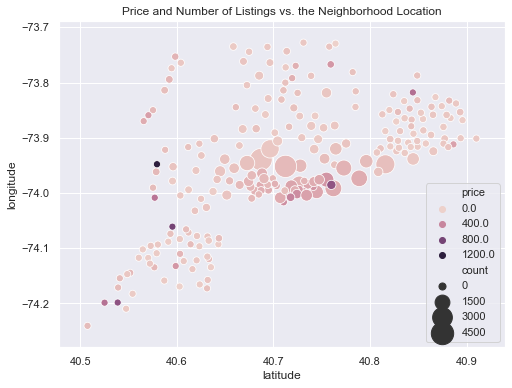

In [75]:
sns.set(color_codes=True)
plt.figure(figsize=(8,6))
plot1 = sns.scatterplot(data = metric_by_neighbor, x = "latitude", y = "longitude"
                        ,hue = "price" 
                        ,size = "count"
                        ,sizes = (50,500)
                       )
plot1.set_title("Price and Number of Listings vs. the Neighborhood Location")
plot1.legend(loc = "lower right")

We can check the exact neighborhoods that have the most expensive listings or the most sufficient supply. As expected, listings in Manhanttan have the highest price in average, whereas Bedford-Stuyvesant provides the largest number of listings.

In [76]:
print(metric_by_neighbor["price"].sort_values(ascending = False).head(), end = '\n\n')
print(metric_by_neighbor["count"].sort_values(ascending = False).head())

neighbourhood
Manhattan Beach     1098.800000
Fort Wadsworth       800.000000
Woodrow              700.000000
Theater District     690.763754
Country Club         525.000000
Name: price, dtype: float64

neighbourhood
Bedford-Stuyvesant    3974
Williamsburg          3936
Harlem                2746
Bushwick              2504
Hell's Kitchen        2052
Name: count, dtype: int64


The number of bedrooms, bathrooms, guests to be accommodated, and the beds are also promising features of a listing that can impact the price. Hence, we want to have a first glance of these four variables. In general, most values of these quantities are below 5 while outliers exist in each of these variables. We might consider to exclude the outliers when conducting the formal analysis.

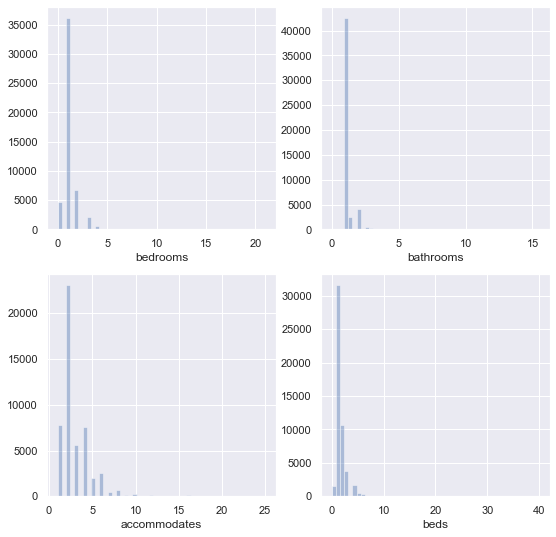

In [77]:
plt.figure(figsize=(9,9))
plt.subplot(221)
sns.distplot(data_listing_detail["bedrooms"].dropna(), kde=False)
plt.subplot(222)
sns.distplot(data_listing_detail["bathrooms"].dropna(), kde=False)
plt.subplot(223)
sns.distplot(data_listing_detail["accommodates"].dropna(), kde=False)
plt.subplot(224)
sns.distplot(data_listing_detail["beds"].dropna(), kde=False)